**Linear** **Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("regression.csv")


In [4]:
df.head()

,Unnamed: 0,Unnamed: 1
0,x,z
1,-10,-41.5
2,-9,-31.5
3,-8,-28.5
4,-7,-27.5


In [5]:
m = np.arange(-10, 10, 0.1)
c = np.arange(-10, 10, 0.1)

In [6]:
mc = []
for i in m:
    for j in c:
        mc.append((i, j))

In [7]:
mc_set = [(i,j) for i,j in zip(m,c)]

X = df['Unnamed: 0'].values
Y = df['Unnamed: 1'].values

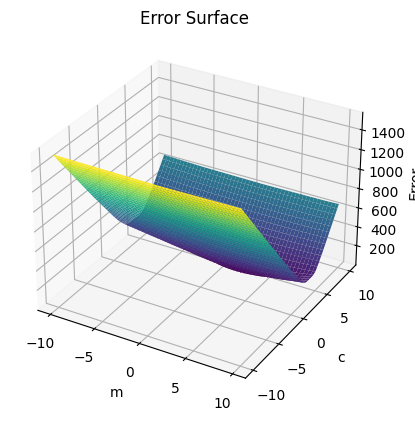

In [8]:
err = np.zeros(len(mc))

# Convert X and Y to numeric types
X_numeric = np.array(X[1:], dtype=float)
Y_numeric = np.array(Y[1:], dtype=float)

# Error
for index, (i, j) in enumerate(mc):
    pred_y = i * X_numeric + j
    error = np.sum(np.abs(Y_numeric - pred_y))
    err[index] = error



err = err.reshape(len(m), len(c))
M, C = np.meshgrid(m, c)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, C, err, cmap='viridis')


ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('Error')


plt.title('Error Surface')
plt.show()

**Gradient** **Descend**

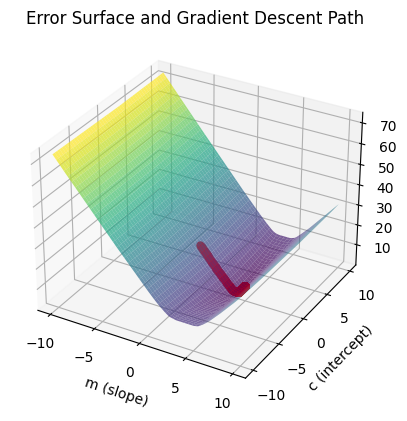

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('regression.csv')

# Define ranges for m and c
m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)

# Extract x and y values from the DataFrame
x_values = df.iloc[1:, 0].values.astype(float)  # Convert to numeric type
y_values = df.iloc[1:, 1].values.astype(float)

# Create a mesh grid for m and c values
M, C = np.meshgrid(m_values, c_values)
errors = np.zeros(M.shape)

# Calculate the errors for the entire grid
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        mi = M[i, j]
        ci = C[i, j]
        predicted_y = mi * x_values + ci
        errors[i, j] = np.sum(np.abs(y_values - predicted_y)) / len(y_values)  # Mean Absolute Error (MAE)

# Function to compute MAE and its gradients
def compute_error_and_gradients(m, c, x_values, y_values):
    N = len(y_values)
    predicted_y = m * x_values + c
    error = np.sum(np.abs(y_values - predicted_y)) / N  # Mean Absolute Error
    error_gradient_m = -np.sum(np.sign(y_values - predicted_y) * x_values) / N  # Gradient w.r.t. m
    error_gradient_c = -np.sum(np.sign(y_values - predicted_y)) / N  # Gradient w.r.t. c
    return error, error_gradient_m, error_gradient_c

# Gradient descent parameters
learning_rate = 0.01
num_iterations = 1000
m_current = 0  # Starting value for m (slope)
c_current = 0  # Starting value for c (intercept)

# To store the path of m and c values
m_history = [m_current]
c_history = [c_current]
error_history = []

# Gradient descent loop
for i in range(num_iterations):
    error, grad_m, grad_c = compute_error_and_gradients(m_current, c_current, x_values, y_values)
    m_current -= learning_rate * grad_m  # Update m
    c_current -= learning_rate * grad_c  # Update c

    # Save the values at each iteration for plotting
    m_history.append(m_current)
    c_history.append(c_current)
    error_history.append(error)

# Create the 3D plot of the error surface using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the error surface
ax.plot_surface(M, C, errors, cmap='viridis', alpha=0.7)

# Plot the gradient descent path on the surface
error_path = np.zeros(len(m_history))
for i in range(len(m_history)):
    predicted_y = m_history[i] * x_values + c_history[i]
    error_path[i] = np.sum(np.abs(y_values - predicted_y)) / len(y_values)  # Error at each step

# Plot the path of gradient descent
ax.plot(m_history, c_history, error_path, color='red', marker='o', markersize=5, label='Gradient Descent Path')

# Set axis labels
ax.set_xlabel('m (slope)')
ax.set_ylabel('c (intercept)')
ax.set_zlabel('Error')

# Add a title
ax.set_title('Error Surface and Gradient Descent Path')

# Show the plot
plt.show()



**1) Batch Gradient Descend**

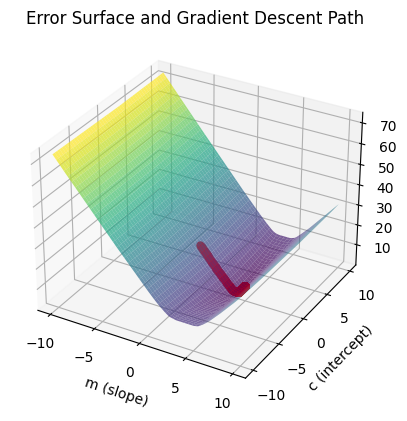

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('regression.csv')

# Define ranges for m and c
m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)

# Extract x and y values from the DataFrame
x_values = df.iloc[1:, 0].values.astype(float)  # Convert to numeric type
y_values = df.iloc[1:, 1].values.astype(float)

# Create a mesh grid for m and c values
M, C = np.meshgrid(m_values, c_values)
errors = np.zeros(M.shape)

# Calculate the errors for the entire grid
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        mi = M[i, j]
        ci = C[i, j]
        predicted_y = mi * x_values + ci
        errors[i, j] = np.sum(np.abs(y_values - predicted_y)) / len(y_values)  # Mean Absolute Error (MAE)

# Function to compute MAE and its gradients
def compute_error_and_gradients(m, c, x_values, y_values):
    N = len(y_values)  # Full batch size
    predicted_y = m * x_values + c
    error = np.sum(np.abs(y_values - predicted_y)) / N  # Mean Absolute Error
    error_gradient_m = -np.sum(np.sign(y_values - predicted_y) * x_values) / N  # Gradient w.r.t. m
    error_gradient_c = -np.sum(np.sign(y_values - predicted_y)) / N  # Gradient w.r.t. c
    return error, error_gradient_m, error_gradient_c

# Gradient descent parameters
learning_rate = 0.01
num_iterations = 1000
m_current = 0  # Starting value for m (slope)
c_current = 0  # Starting value for c (intercept)

# To store the path of m and c values
m_history = [m_current]
c_history = [c_current]
error_history = []

# Batch Gradient Descent loop (batch = full dataset)
for i in range(num_iterations):
    error, grad_m, grad_c = compute_error_and_gradients(m_current, c_current, x_values, y_values)

    # Update m and c using full batch gradients
    m_current -= learning_rate * grad_m  # Update m
    c_current -= learning_rate * grad_c  # Update c

    # Save the values at each iteration for plotting
    m_history.append(m_current)
    c_history.append(c_current)
    error_history.append(error)

# Create the 3D plot of the error surface using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the error surface
ax.plot_surface(M, C, errors, cmap='viridis', alpha=0.7)

# Plot the gradient descent path on the surface
error_path = np.zeros(len(m_history))
for i in range(len(m_history)):
    predicted_y = m_history[i] * x_values + c_history[i]
    error_path[i] = np.sum(np.abs(y_values - predicted_y)) / len(y_values)  # Error at each step

# Plot the path of gradient descent
ax.plot(m_history, c_history, error_path, color='red', marker='o', markersize=5, label='Gradient Descent Path')

# Set axis labels
ax.set_xlabel('m (slope)')
ax.set_ylabel('c (intercept)')
ax.set_zlabel('Error')

# Add a title
ax.set_title('Error Surface and Gradient Descent Path')

# Show the plot
plt.show()


**2) Mini-Batch Gradient Descend**

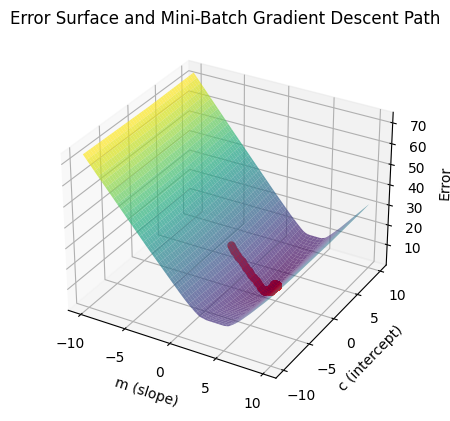

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('regression.csv')

# Define ranges for m and c
m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)

# Extract x and y values from the DataFrame
x_values = df.iloc[1:, 0].values.astype(float)  # Convert to numeric type
y_values = df.iloc[1:, 1].values.astype(float)

# Create a mesh grid for m and c values
M, C = np.meshgrid(m_values, c_values)
errors = np.zeros(M.shape)

# Calculate the errors for the entire grid
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        mi = M[i, j]
        ci = C[i, j]
        predicted_y = mi * x_values + ci
        errors[i, j] = np.sum(np.abs(y_values - predicted_y)) / len(y_values)  # Mean Absolute Error (MAE)

# Function to compute MAE and its gradients
def compute_error_and_gradients(m, c, x_batch, y_batch):
    N = len(y_batch)  # Batch size
    predicted_y = m * x_batch + c
    error = np.sum(np.abs(y_batch - predicted_y)) / N  # Mean Absolute Error
    error_gradient_m = -np.sum(np.sign(y_batch - predicted_y) * x_batch) / N  # Gradient w.r.t. m
    error_gradient_c = -np.sum(np.sign(y_batch - predicted_y)) / N  # Gradient w.r.t. c
    return error, error_gradient_m, error_gradient_c

# Gradient descent parameters
learning_rate = 0.01
num_iterations = 1000
batch_size = 10  # Mini-batch size

m_current = 0  # Starting value for m (slope)
c_current = 0  # Starting value for c (intercept)

# To store the path of m and c values
m_history = [m_current]
c_history = [c_current]
error_history = []

# Mini-batch Gradient Descent loop
for i in range(num_iterations):
    # Shuffle the data at each iteration
    indices = np.random.permutation(len(x_values))
    x_values_shuffled = x_values[indices]
    y_values_shuffled = y_values[indices]

    # Loop over mini-batches
    for j in range(0, len(x_values), batch_size):
        # Select mini-batch
        x_batch = x_values_shuffled[j:j + batch_size]
        y_batch = y_values_shuffled[j:j + batch_size]

        # Compute the error and gradients for the mini-batch
        error, grad_m, grad_c = compute_error_and_gradients(m_current, c_current, x_batch, y_batch)

        # Update m and c using mini-batch gradients
        m_current -= learning_rate * grad_m  # Update m
        c_current -= learning_rate * grad_c  # Update c

    # Save the values at the end of each epoch for plotting
    m_history.append(m_current)
    c_history.append(c_current)
    error_history.append(error)

# Create the 3D plot of the error surface using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the error surface
ax.plot_surface(M, C, errors, cmap='viridis', alpha=0.7)

# Plot the gradient descent path on the surface
error_path = np.zeros(len(m_history))
for i in range(len(m_history)):
    predicted_y = m_history[i] * x_values + c_history[i]
    error_path[i] = np.sum(np.abs(y_values - predicted_y)) / len(y_values)  # Error at each step

# Plot the path of gradient descent
ax.plot(m_history, c_history, error_path, color='red', marker='o', markersize=5, label='Gradient Descent Path')

# Set axis labels
ax.set_xlabel('m (slope)')
ax.set_ylabel('c (intercept)')
ax.set_zlabel('Error')

# Add a title
ax.set_title('Error Surface and Mini-Batch Gradient Descent Path')

# Show the plot
plt.show()


**3) Stochastic Gradient Descend**

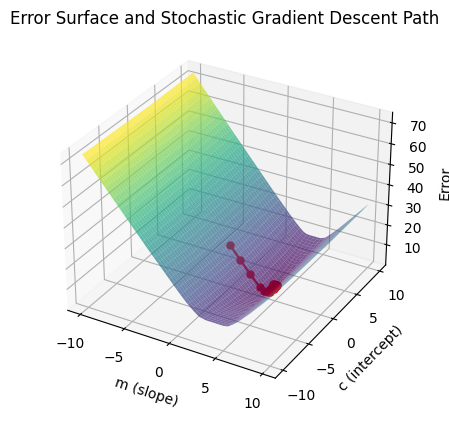

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
df = pd.read_csv('regression.csv')

# Define ranges for m and c
m_values = np.arange(-10, 10, 0.1)
c_values = np.arange(-10, 10, 0.1)

# Extract x and y values from the DataFrame
x_values = df.iloc[1:, 0].values.astype(float)  # Convert to numeric type
y_values = df.iloc[1:, 1].values.astype(float)

# Create a mesh grid for m and c values
M, C = np.meshgrid(m_values, c_values)
errors = np.zeros(M.shape)

# Calculate the errors for the entire grid
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        mi = M[i, j]
        ci = C[i, j]
        predicted_y = mi * x_values + ci
        errors[i, j] = np.sum(np.abs(y_values - predicted_y)) / len(y_values)  # Mean Absolute Error (MAE)

# Function to compute MAE and its gradients for a single data point
def compute_error_and_gradients_for_single_point(m, c, x_single, y_single):
    predicted_y = m * x_single + c
    error = np.abs(y_single - predicted_y)  # Absolute Error for the single point
    error_gradient_m = -np.sign(y_single - predicted_y) * x_single  # Gradient w.r.t. m
    error_gradient_c = -np.sign(y_single - predicted_y)  # Gradient w.r.t. c
    return error, error_gradient_m, error_gradient_c

# Gradient descent parameters
learning_rate = 0.01
num_iterations = 100  # Number of full passes through the dataset (epochs)

m_current = 0  # Starting value for m (slope)
c_current = 0  # Starting value for c (intercept)

# To store the path of m and c values
m_history = [m_current]
c_history = [c_current]
error_history = []

# Stochastic Gradient Descent loop
for epoch in range(num_iterations):
    # Shuffle the data at each epoch
    indices = np.random.permutation(len(x_values))
    x_values_shuffled = x_values[indices]
    y_values_shuffled = y_values[indices]

    # Loop over each data point (stochastic update)
    for i in range(len(x_values_shuffled)):
        x_single = x_values_shuffled[i]
        y_single = y_values_shuffled[i]

        # Compute the error and gradients for the single data point
        error, grad_m, grad_c = compute_error_and_gradients_for_single_point(m_current, c_current, x_single, y_single)

        # Update m and c using the gradients from the single point
        m_current -= learning_rate * grad_m
        c_current -= learning_rate * grad_c

    # Save the values at the end of each epoch for plotting
    m_history.append(m_current)
    c_history.append(c_current)
    error_history.append(error)

# Create the 3D plot of the error surface using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the error surface
ax.plot_surface(M, C, errors, cmap='viridis', alpha=0.7)

# Plot the gradient descent path on the surface
error_path = np.zeros(len(m_history))
for i in range(len(m_history)):
    predicted_y = m_history[i] * x_values + c_history[i]
    error_path[i] = np.sum(np.abs(y_values - predicted_y)) / len(y_values)  # Error at each step

# Plot the path of gradient descent
ax.plot(m_history, c_history, error_path, color='red', marker='o', markersize=5, label='Gradient Descent Path')

# Set axis labels
ax.set_xlabel('m (slope)')
ax.set_ylabel('c (intercept)')
ax.set_zlabel('Error')

# Add a title
ax.set_title('Error Surface and Stochastic Gradient Descent Path')

# Show the plot
plt.show()
